# Testing possible atom mappings in perses
### Module to test how a hybrid system will be generated for a system

In [1]:
# from perses.utils.openeye import createOEMolFromSDF
from perses.utils.smallmolecules import render_atom_mapping
from perses.utils.openeye import smiles_to_oemol
from perses.rjmc.topology_proposal import AtomMapper
from openeye import oechem
import itertools
from IPython.display import display, Image

#### Starting by just using the three default options in perses

INFO:utils.openeye:molecule                       does not have unique atom names. Generating now...
INFO:utils.openeye:molecule                       does not have unique atom names. Generating now...
INFO:utils.openeye:molecule                       does not have unique atom names. Generating now...
INFO:utils.openeye:molecule                       does not have unique atom names. Generating now...
INFO:proposal_generator:Using core to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 12
INFO:proposal_generator:There are 12 before filtering
INFO:proposal_generator:There are 12 after filtering to remove maps with fewer matches than 6 atoms
INFO:proposal_generator:1 scaffold maps for A
INFO:proposal_generator:Scaffold to molA: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
INFO:proposal_generator:1 scaffold maps for B
INFO:proposal_generator:Scaffold to molB: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
INFO:proposal_generator:Finding best map using matching_criterion index
INFO:propo

Doing weak mapping
benzene ---> toluene ✓


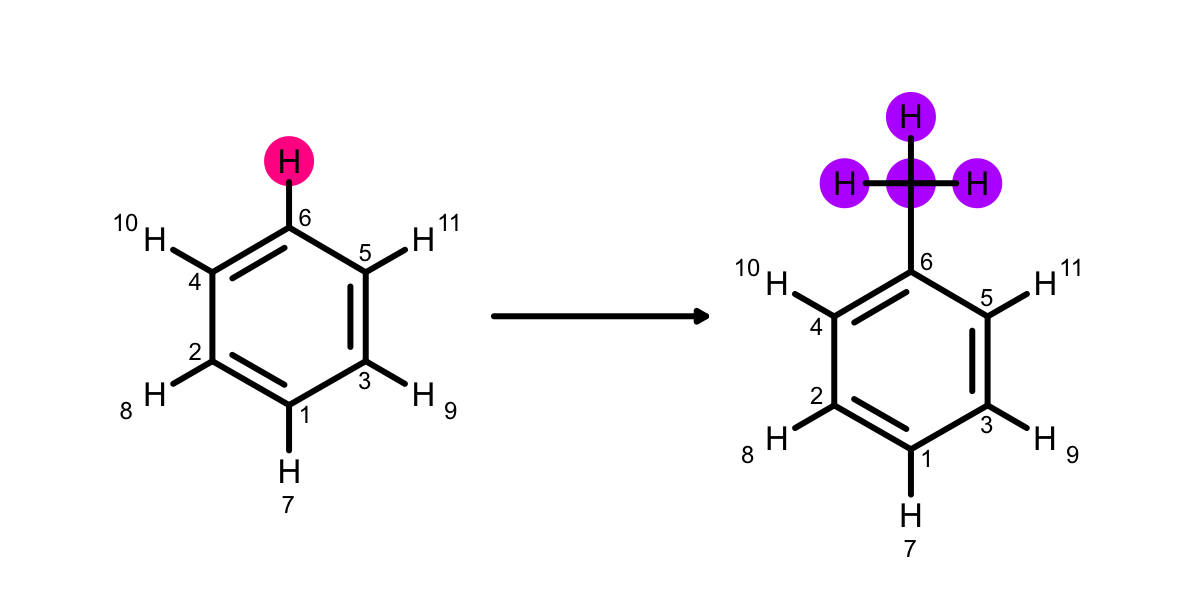

INFO:proposal_generator:Using core to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 12
INFO:proposal_generator:There are 12 before filtering
INFO:proposal_generator:There are 12 after filtering to remove maps with fewer matches than 6 atoms
INFO:proposal_generator:1 scaffold maps for A
INFO:proposal_generator:Scaffold to molA: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
INFO:proposal_generator:1 scaffold maps for B
INFO:proposal_generator:Scaffold to molB: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
INFO:proposal_generator:Finding best map using matching_criterion index
INFO:proposal_generator:12 have 11 core atoms. Using matching_criterion index to return the best of those


benzene ---> nitrobenzene ✓


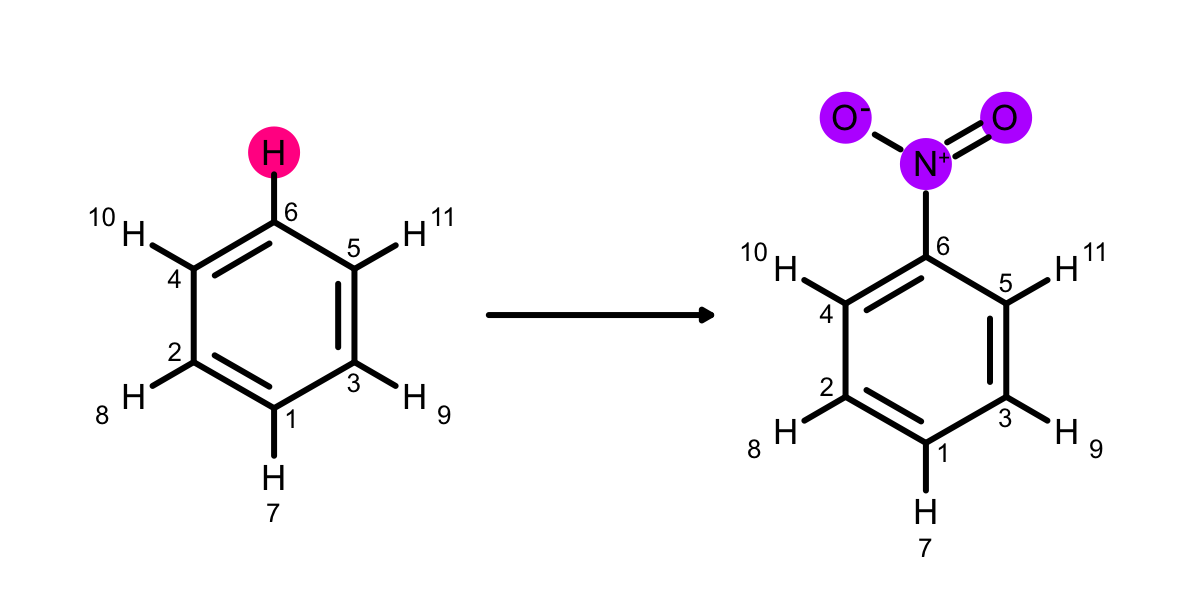

INFO:proposal_generator:Using core to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 12
INFO:proposal_generator:There are 12 before filtering
INFO:proposal_generator:There are 12 after filtering to remove maps with fewer matches than 6 atoms
INFO:proposal_generator:1 scaffold maps for A
INFO:proposal_generator:Scaffold to molA: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
INFO:proposal_generator:1 scaffold maps for B
INFO:proposal_generator:Scaffold to molB: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
INFO:proposal_generator:Finding best map using matching_criterion index
INFO:proposal_generator:864 have 0 core atoms. Using matching_criterion index to return the best of those
INFO:proposal_generator:Using core to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 12
INFO:proposal_generator:There are 12 before filtering
INFO:proposal_generator:There are 12 after filtering to remove maps with fewer matches than 6 atoms
INFO:proposal_generator:1 scaffold maps for 

Cannot map benzene to cyclohexane effectively with weak map strength
toluene ---> nitrobenzene ✓


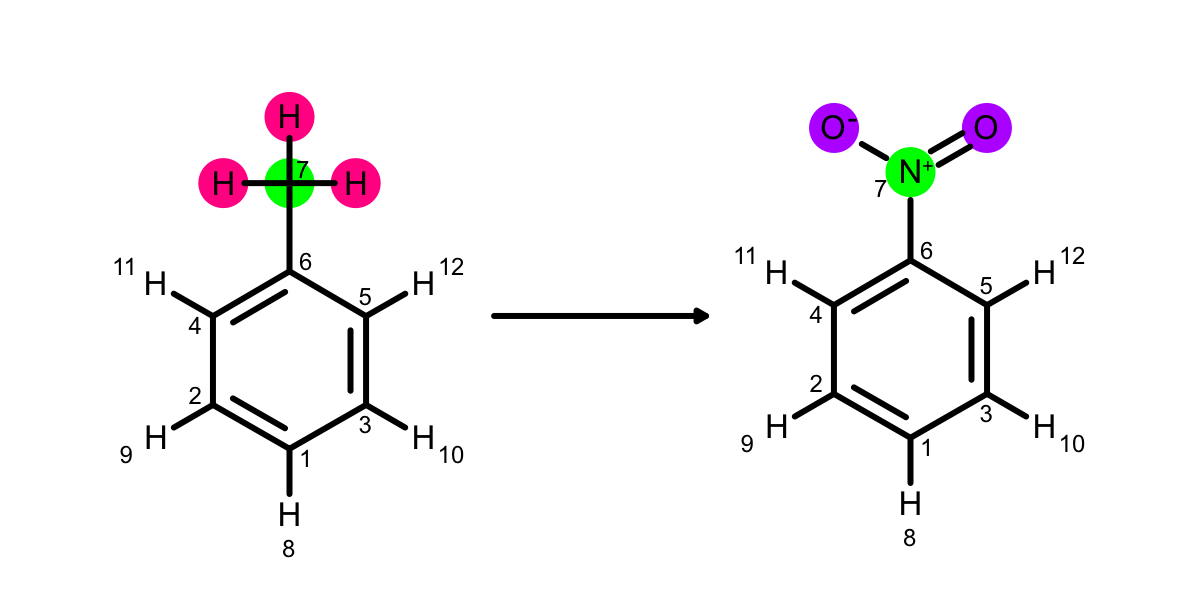

INFO:proposal_generator:Using core to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 12
INFO:proposal_generator:There are 12 before filtering
INFO:proposal_generator:There are 12 after filtering to remove maps with fewer matches than 6 atoms
INFO:proposal_generator:1 scaffold maps for A
INFO:proposal_generator:Scaffold to molA: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
INFO:proposal_generator:1 scaffold maps for B
INFO:proposal_generator:Scaffold to molB: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
INFO:proposal_generator:Finding best map using matching_criterion index
INFO:proposal_generator:72 have 2 core atoms. Using matching_criterion index to return the best of those
INFO:proposal_generator:Using core to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 12
INFO:proposal_generator:There are 12 before filtering
INFO:proposal_generator:There are 12 after filtering to remove maps with fewer matches than 6 atoms
INFO:proposal_generator:1 scaffold maps for A

Cannot map toluene to cyclohexane effectively with weak map strength
Cannot map nitrobenzene to cyclohexane effectively with weak map strength



In [3]:
smiles = {'benzene':'c1ccccc1','toluene':'c1ccccc1C','nitrobenzene':'C1=CC=C(C=C1)[N+](=O)[O-]','cyclohexane':'C1CCCCC1'}
list_of_mols = []
for name,smi in smiles.items():
    mol = smiles_to_oemol(smi, title=name)
    list_of_mols.append(mol)


names_and_oemols = dict(zip(smiles.keys(),list_of_mols))

# looping over default mapping strengths
for map_strength in ['weak']:
    print(f'Doing {map_strength} mapping')
    for nameA,nameB in itertools.combinations(names_and_oemols,2):
        molA = names_and_oemols[nameA]
        molB = names_and_oemols[nameB]
        mapping = AtomMapper._get_mol_atom_map(molA,molB,map_strength=map_strength)

        if mapping is None or len(mapping) < 3:
            # too many unique atoms
            print(f'Cannot map {nameA} to {nameB} effectively with {map_strength} map strength')
        else:
            print(f'{nameA} ---> {nameB} '+u'\u2713')
            render_atom_mapping(f'{nameA}to{nameB}_{map_strength}.png', molA, molB, mapping)
            i = Image(filename=f'{nameA}to{nameB}_{map_strength}.png')
            display(i)
    print()

In [4]:
# download files of interest from openmm-forcefields repo!
import os
os.system('wget https://raw.githubusercontent.com/openmm/openmmforcefields/master/openmmforcefields/data/perses_jacs_systems/bace/Bace_ligands_shifted.sdf')


os.system('wget https://raw.githubusercontent.com/openmm/openmmforcefields/master/openmmforcefields/data/perses_jacs_systems/jnk1/Jnk1_ligands.sdf')



6

#### Now lets try a few different mapping schemes using openeye's `OEExprOpts`

https://docs.eyesopen.com/toolkits/python/oechemtk/OEChemConstants/OEExprOpts.html

INFO:proposal_generator:Using core to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 4
INFO:proposal_generator:There are 4 before filtering
INFO:proposal_generator:There are 4 after filtering to remove maps with fewer matches than 17 atoms
INFO:proposal_generator:1 scaffold maps for A
INFO:proposal_generator:Scaffold to molA: {0: 1, 1: 2, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10, 9: 11, 14: 12, 13: 13, 12: 14, 11: 15, 10: 17, 15: 18, 16: 19, 17: 20, 18: 21, 19: 22, 20: 23, 21: 24}
INFO:proposal_generator:1 scaffold maps for B
INFO:proposal_generator:Scaffold to molB: {0: 1, 1: 2, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10, 9: 11, 14: 12, 13: 13, 12: 14, 11: 15, 10: 17, 15: 18, 16: 19, 17: 20, 18: 21, 19: 22}
INFO:proposal_generator:Finding best map using matching_criterion index
INFO:proposal_generator:8 have 43 core atoms. Using matching_criterion index to return the best of those


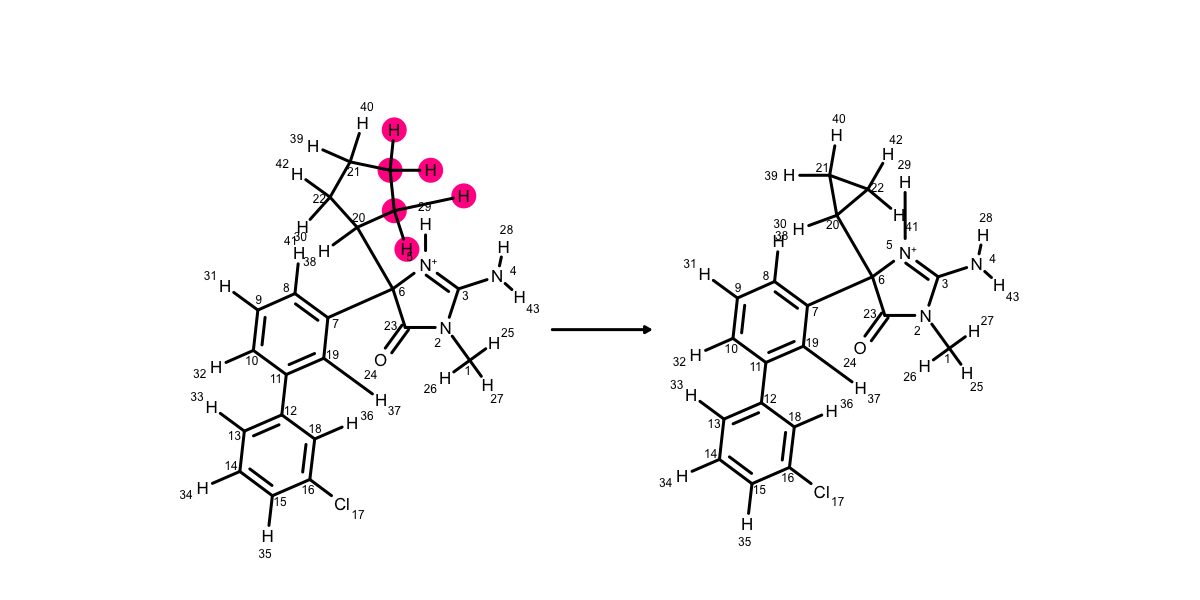

INFO:proposal_generator:Using core to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 4
INFO:proposal_generator:There are 4 before filtering
INFO:proposal_generator:There are 4 after filtering to remove maps with fewer matches than 17 atoms
INFO:proposal_generator:1 scaffold maps for A
INFO:proposal_generator:Scaffold to molA: {0: 1, 1: 2, 2: 4, 3: 5, 4: 7, 5: 8, 6: 9, 7: 10, 8: 11, 9: 12, 14: 13, 13: 14, 12: 15, 11: 16, 10: 18, 15: 19, 16: 20}
INFO:proposal_generator:1 scaffold maps for B
INFO:proposal_generator:Scaffold to molB: {0: 1, 1: 2, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10, 9: 11, 14: 12, 13: 13, 12: 14, 11: 15, 10: 17, 15: 18, 16: 19, 21: 20, 20: 21, 19: 22, 18: 23, 17: 24, 22: 25}
INFO:proposal_generator:Finding best map using matching_criterion index
INFO:proposal_generator:4 have 34 core atoms. Using matching_criterion index to return the best of those


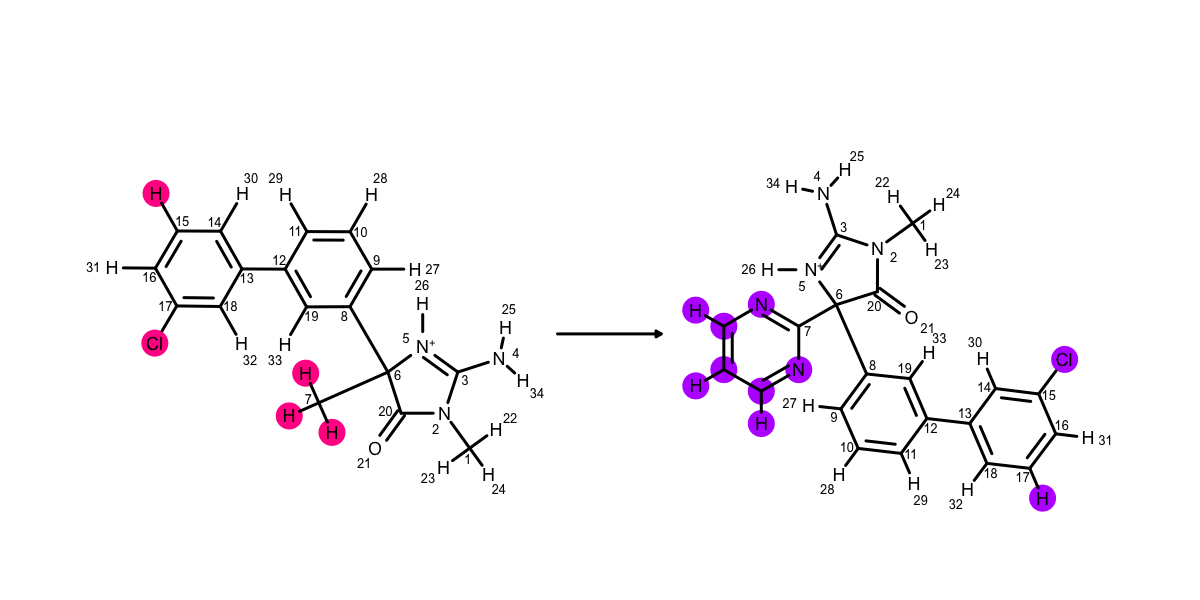

INFO:proposal_generator:Using core to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 4
INFO:proposal_generator:There are 4 before filtering
INFO:proposal_generator:There are 4 after filtering to remove maps with fewer matches than 17 atoms
INFO:proposal_generator:1 scaffold maps for A
INFO:proposal_generator:Scaffold to molA: {0: 1, 1: 2, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10, 9: 11, 10: 12, 11: 13, 12: 14, 13: 15, 14: 16, 15: 17, 16: 18, 17: 19, 18: 20, 19: 21, 20: 23, 21: 24, 22: 25}


INFO:proposal_generator:1 scaffold maps for B
INFO:proposal_generator:Scaffold to molB: {0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10, 9: 11, 10: 12, 11: 13, 12: 14, 13: 15, 14: 16, 15: 17, 16: 19, 17: 21, 18: 23, 19: 24}
INFO:proposal_generator:Finding best map using matching_criterion index
INFO:proposal_generator:48 have 39 core atoms. Using matching_criterion index to return the best of those


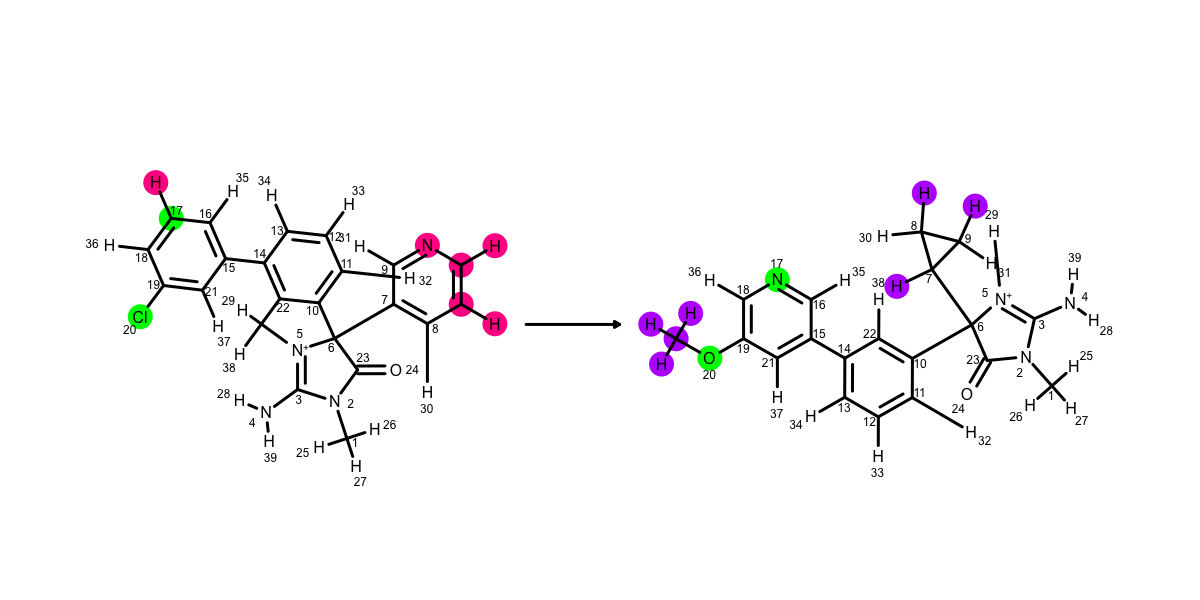

In [11]:
# this just checks atoms are in rings of the same size, with no check for aromaticity
atom_expr = 0
bond_expr = oechem.OEExprOpts_RingMember 

from openforcefield.topology import Molecule
molecules = Molecule.from_file('Bace_ligands_shifted.sdf')
list_of_mols = [ molecule.to_openeye() for molecule in molecules]

index_pairs = [(0,1),(9,7),(10,35)]

for index_i, index_j in index_pairs:
    molA = list_of_mols[index_i]
    molB = list_of_mols[index_j]    
    mapping = AtomMapper._get_mol_atom_map(molA,molB,atom_expr=atom_expr,bond_expr=bond_expr)
    
    render_atom_mapping(f'{nameA}to{nameB}.png', molA, molB, mapping)
    i = Image(filename=f'{nameA}to{nameB}.png')
    display(i)
    print()
    

Now lets look at different map_strategy's that can be used, that can prioritise different mappings

INFO:proposal_generator:Using core to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 8
INFO:proposal_generator:There are 8 before filtering
INFO:proposal_generator:There are 8 after filtering to remove maps with fewer matches than 15 atoms
INFO:proposal_generator:1 scaffold maps for A
INFO:proposal_generator:Scaffold to molA: {0: 3, 1: 4, 2: 5, 3: 6, 4: 7, 5: 9, 6: 12, 7: 13, 8: 15, 9: 16, 10: 17, 11: 18, 12: 20, 13: 21, 14: 22}
INFO:proposal_generator:1 scaffold maps for B
INFO:proposal_generator:Scaffold to molB: {0: 3, 1: 4, 2: 5, 3: 6, 4: 7, 5: 9, 6: 12, 7: 13, 8: 15, 9: 16, 10: 17, 11: 20, 12: 21, 13: 22, 14: 23}
INFO:proposal_generator:Finding best map using matching_criterion index
INFO:proposal_generator:3 have 37 core atoms. Using matching_criterion index to return the best of those


core✓


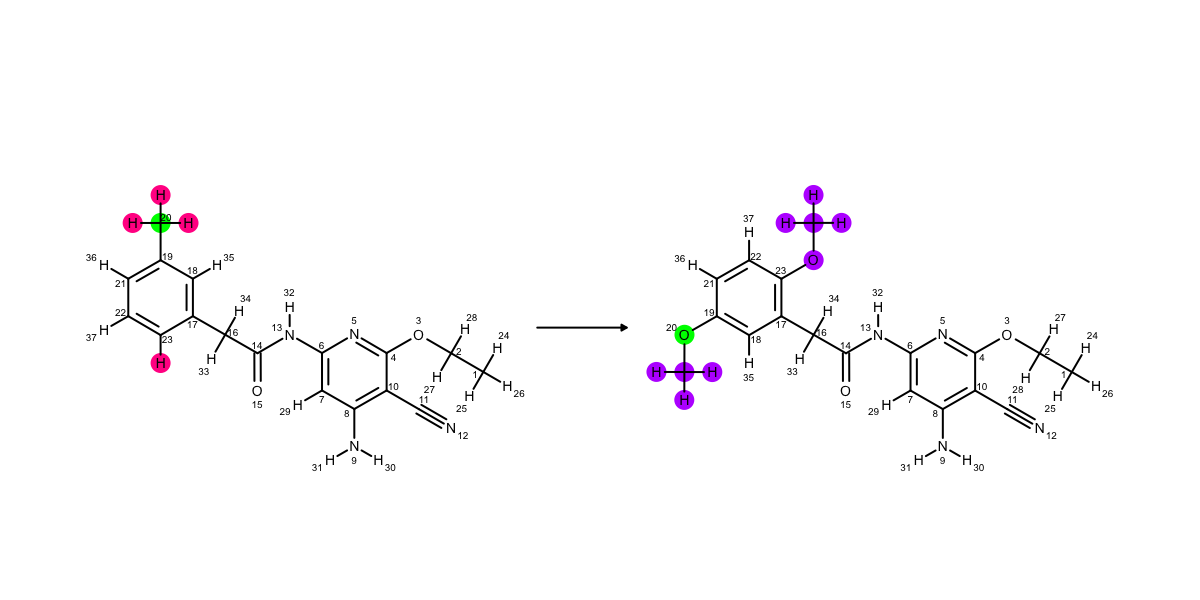

INFO:proposal_generator:Using geometry to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 8
INFO:proposal_generator:There are 8 before filtering
INFO:proposal_generator:There are 8 after filtering to remove maps with fewer matches than 15 atoms
INFO:proposal_generator:1 scaffold maps for A
INFO:proposal_generator:Scaffold to molA: {0: 3, 1: 4, 2: 5, 3: 6, 4: 7, 5: 9, 6: 12, 7: 13, 8: 15, 9: 16, 10: 17, 11: 18, 12: 20, 13: 21, 14: 22}
INFO:proposal_generator:1 scaffold maps for B
INFO:proposal_generator:Scaffold to molB: {0: 3, 1: 4, 2: 5, 3: 6, 4: 7, 5: 9, 6: 12, 7: 13, 8: 15, 9: 16, 10: 17, 11: 20, 12: 21, 13: 22, 14: 23}


INFO:proposal_generator:66 maps are reduced to 8
INFO:proposal_generator:molecule_maps_scores: dict_keys([20.791024768657902, 9.411564742065682, 38.76690783981178, 27.387447813219563, 96.38508852563332, 100.50192451595737, 107.81202665890979, 111.92886264923382])
INFO:proposal_generator:Returning map with closest geometry satisfaction


geometry✓


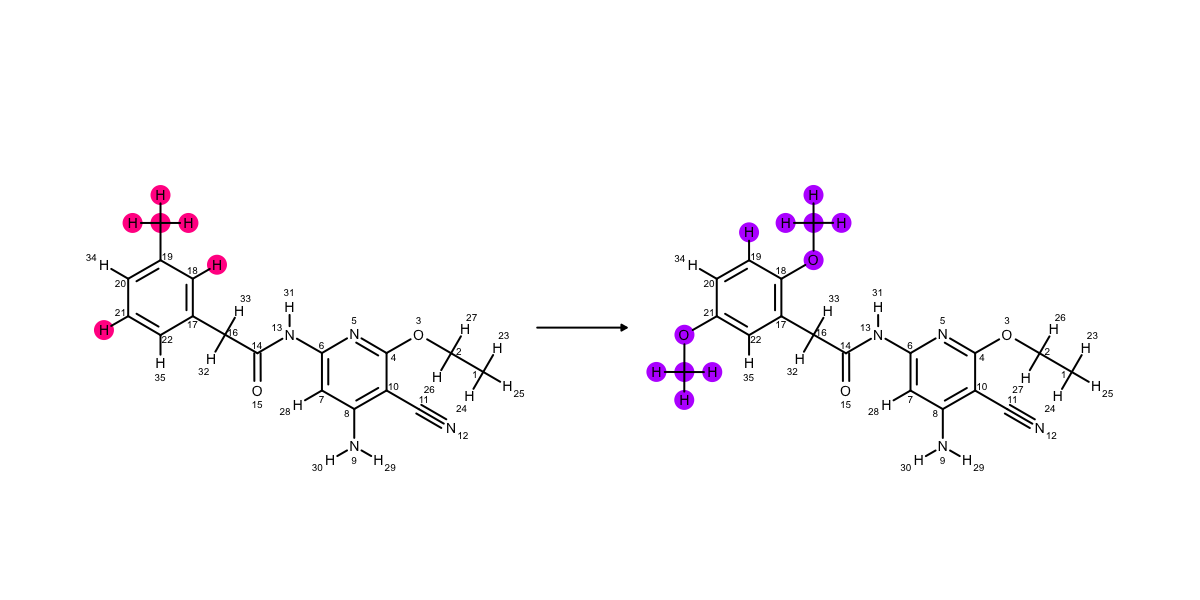

In [30]:
# this just checks atoms are in rings of the same size, with no check for aromaticity
atom_expr = oechem.OEExprOpts_IntType
bond_expr = oechem.OEExprOpts_RingMember 

from openforcefield.topology import Molecule
molecules = Molecule.from_file('Jnk1_ligands.sdf')
list_of_mols = [ molecule.to_openeye() for molecule in molecules ]

molA = list_of_mols[0]
molB = list_of_mols[1]

for map_strategy in ['core','geometry']: 
    mapping = AtomMapper._get_mol_atom_map(molA,molB,atom_expr=atom_expr,bond_expr=bond_expr, map_strategy=map_strategy)

    print(f'{map_strategy}'+u'\u2713')
    render_atom_mapping(f'{nameA}to{nameB}.png', molA, molB, mapping)
    i = Image(filename=f'{nameA}to{nameB}.png')
    display(i)
    print()
    

Here - trying to get as many atoms into the core as possible, maps the methyl and the ether group on to eachother. In reality, these groups point opposite directions in the binding site, and most likely won't freely interconvert in a tightly constrained active site.

Using the `geometry` as the strategy fixes this, and gets them the right way round, even though there are more unique atoms to grow in/dissapear in the simulation.

Finally lets look at all the ways that we can map. --  from best (i.e. geometrically. closest to worse)

INFO:proposal_generator:Using return-all to chose best atom map
INFO:proposal_generator:[15, 15, 15, 15, 15, 15, 15, 15]
INFO:proposal_generator:Scaffold has symmetry of 8
INFO:proposal_generator:[15]
INFO:proposal_generator:[15]
INFO:proposal_generator:[39, 39, 39]
INFO:proposal_generator:[38]
INFO:proposal_generator:[39, 39, 39]
INFO:proposal_generator:[38]
INFO:proposal_generator:[31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
INFO:proposal_generator:[32, 32, 32, 32, 32, 32, 32, 32]
INFO:proposal_generator:[31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
INFO:proposal_generator:[32, 32, 32, 32, 32, 32, 32, 32]
INFO:proposal_generator:44 maps are reduced to 4
INFO:proposal_generator:molecule_maps_scores: dict_keys([20.791024768657902, 9.411564742065682, 107.81202665890979, 111.92886264923382])


geometry score 9.41


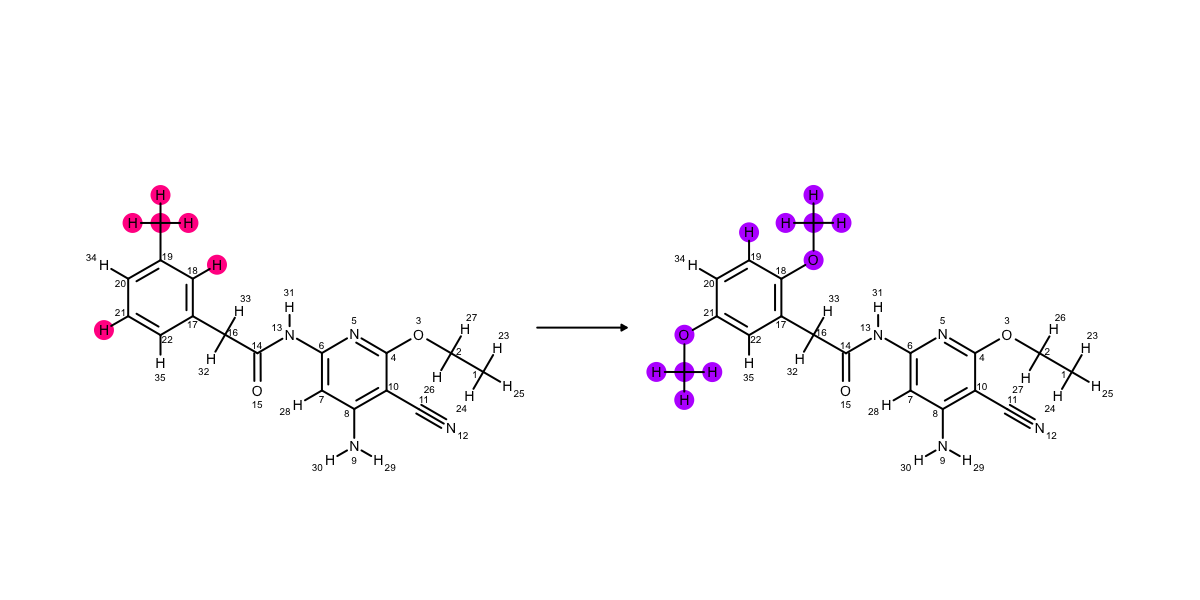


geometry score 20.79


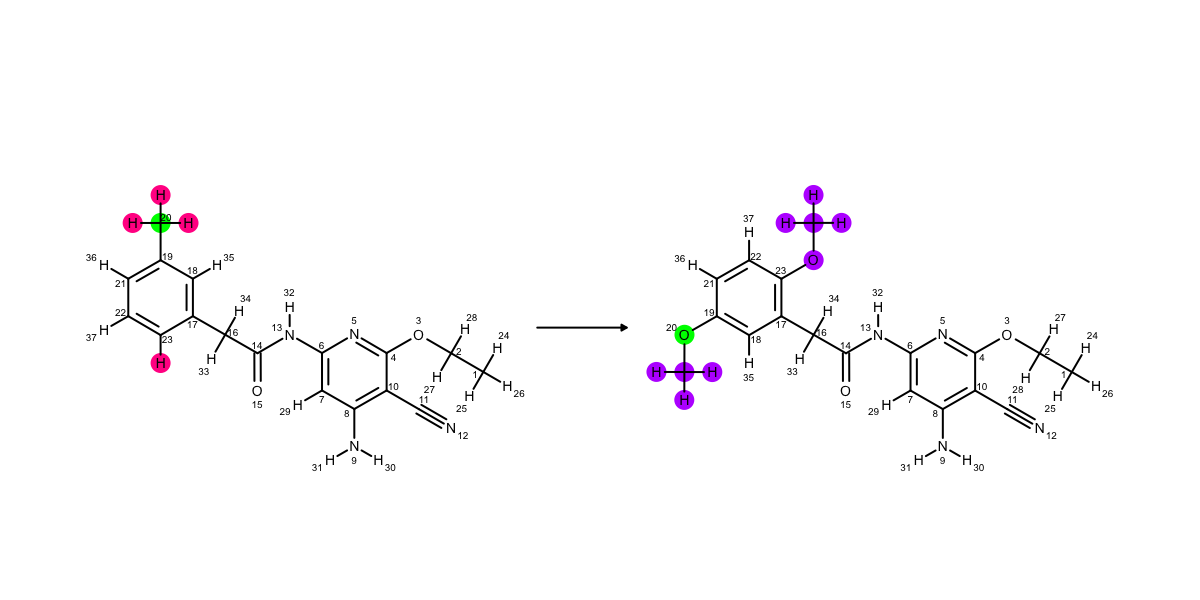


geometry score 107.81


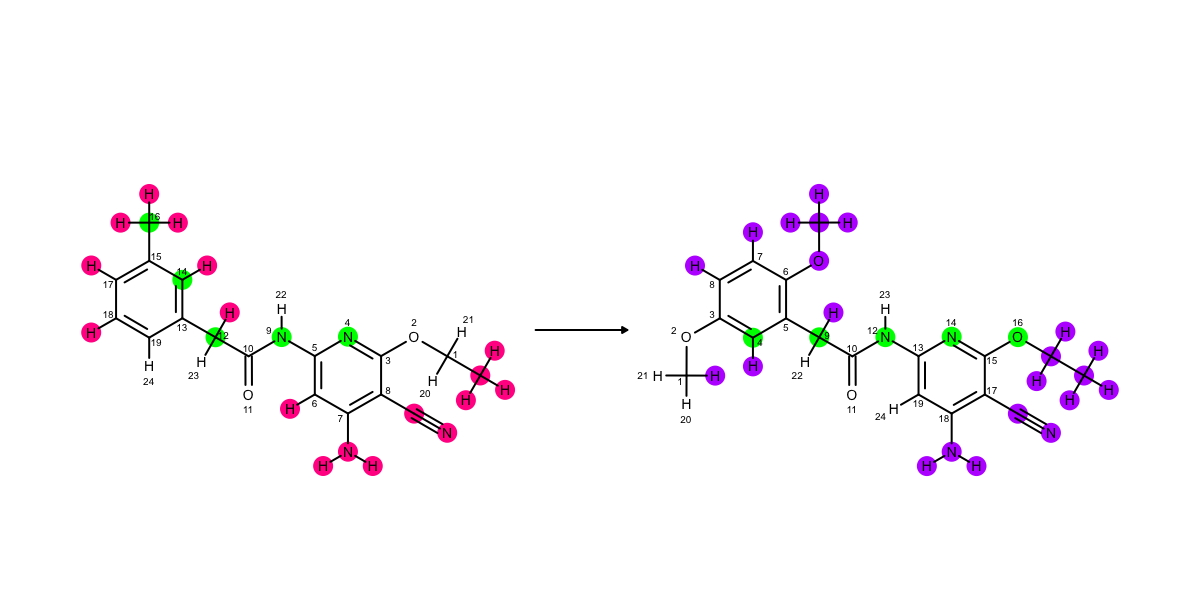


geometry score 111.93


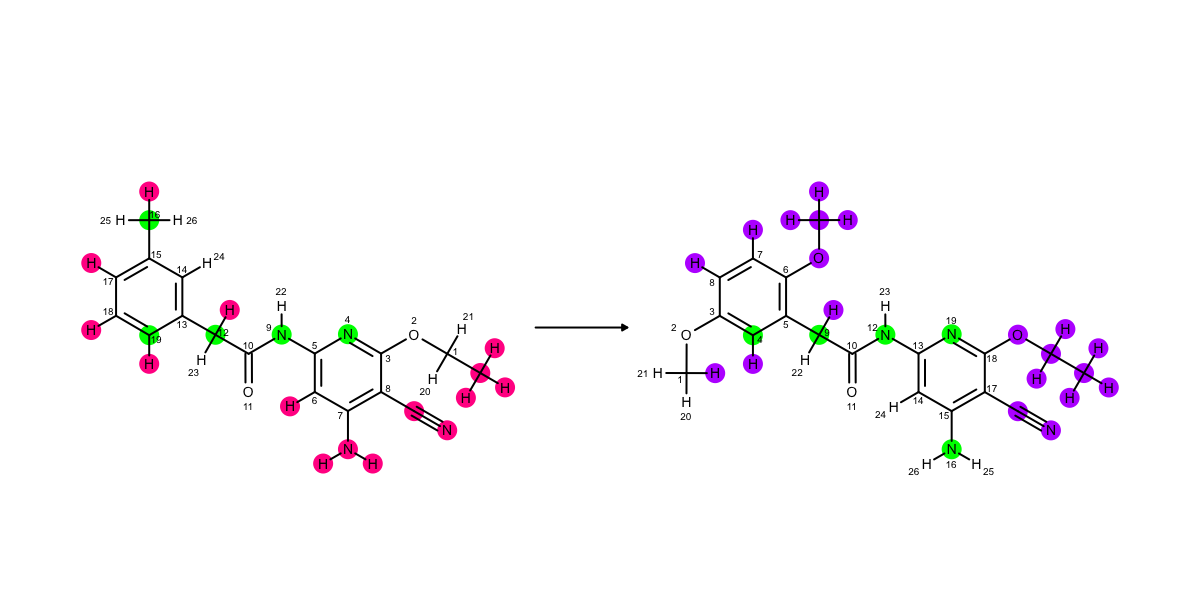

In [9]:
# this just checks atoms are in rings of the same size, with no check for aromaticity
atom_expr = oechem.OEExprOpts_IntType
bond_expr = oechem.OEExprOpts_RingMember 

from openforcefield.topology import Molecule
molecules = Molecule.from_file('Jnk1_ligands.sdf')
list_of_mols = [ molecule.to_openeye() for molecule in molecules ]

molA = list_of_mols[0]
molB = list_of_mols[1]

mappings = AtomMapper._get_mol_atom_map(molA,molB,atom_expr=atom_expr,bond_expr=bond_expr, map_strategy='return-all')

for score, mapping in sorted(mappings.items()):
    print(f'geometry score {score:.2f}')
    render_atom_mapping(f'{nameA}to{nameB}.png', molA, molB, mapping)
    i = Image(filename=f'{nameA}to{nameB}.png')
    display(i)
    print()

Here we see the geometrically best first, with fewer core atoms, and then we see the one with the benzene ring flipped. We can see that more is in the core, but it's further from the input coordinates.

Following these two, the mapping has found symmetry in the scaffold, and has mapped the two aromatic rings the 'wrong way around.' These are geometrically very far from the right binding mode, and have the most atoms not in the core, but in cases where the binding mode of B is very unclear, this might be an interesting experiment to run.